<a href="https://colab.research.google.com/github/kojiyam/information-transmission-engineering/blob/main/jd3_bandwidth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 帯域幅・シンボルレート

これを再生しながら，スペアナアプリなどで観測するとよい

In [73]:
import numpy as np
np.random.seed(1) # 乱数のseedは固定

import matplotlib.pyplot as plt
#plt.style.use('dark_background') # for dark-mode
plt.rcParams["font.size"] = 16

import IPython.display

In [74]:
sampling_rate = 10e3

In [75]:
T_LENGTH = 10 # 音の時間長 (s)
t = np.arange( T_LENGTH * sampling_rate ) / sampling_rate # サンプリング時刻

- 高い方の正弦波が搬送波
- 低い方の正弦波がベースバンド信号（本当は情報をのせる）


In [76]:
s1 = 0.1 * np.cos(2*np.pi*523*t) * np.sin(2*np.pi*1*t)
IPython.display.Audio(s1, rate = sampling_rate, normalize=False)

In [77]:
s2 = 0.1 * np.cos(2*np.pi*587*t) * np.sin(2*np.pi*2*t)
IPython.display.Audio(s2, rate = sampling_rate, normalize=False)

In [78]:
s3 = 0.1 * np.cos(2*np.pi*659*t) * np.sin(2*np.pi*10*t)
IPython.display.Audio(s3, rate = sampling_rate, normalize=False)

In [79]:
IPython.display.Audio(s1+s2+s3, rate = sampling_rate)

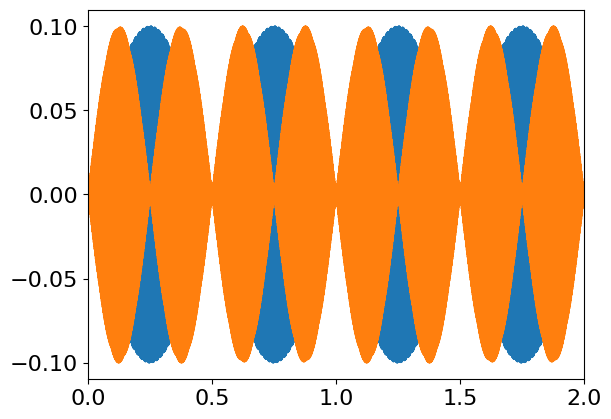

In [80]:
plt.xlim(0,2)
plt.plot(t, s1)
plt.plot(t, s2)

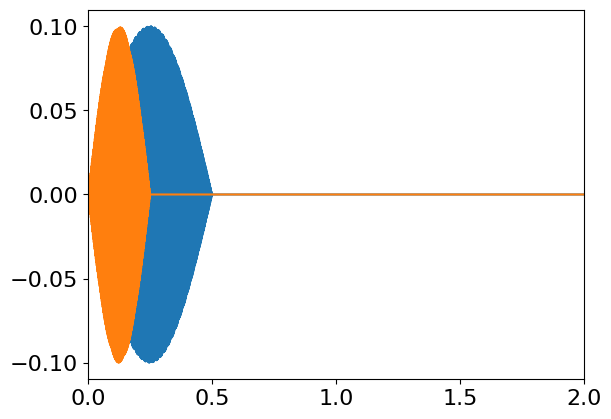

In [81]:
s1l = s1 * (t < 1/2)
s2l = s2 * (t < 1/4)
plt.xlim(0,2)
plt.plot(t, s1l)
plt.plot(t, s2l)


ベースバンド信号の周波数が高いほど，帯域幅は [大きく OR 小さく] なる

# 周波数軸上

In [82]:
S1 = np.fft.fft(s1)
S2 = np.fft.fft(s2)
S3 = np.fft.fft(s3)

S1_power = np.abs(S1/(S1.size/2))**2
S2_power = np.abs(S2/(S2.size/2))**2
S3_power = np.abs(S3/(S3.size/2))**2

In [83]:
S1l = np.fft.fft(s1l)
S1l_power = np.abs(S1l/(S1l.size/2))**2

In [84]:
S2l = np.fft.fft(s2l)

In [85]:
freq = np.fft.fftfreq(s1.size, d=1/sampling_rate)

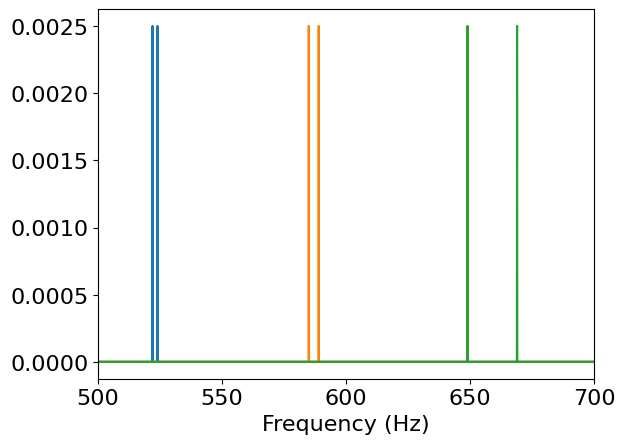

In [86]:
plt.xlim(500,700)
plt.xlabel("Frequency (Hz)")
plt.plot(freq, S1_power)
plt.plot(freq, S2_power)
plt.plot(freq, S3_power)

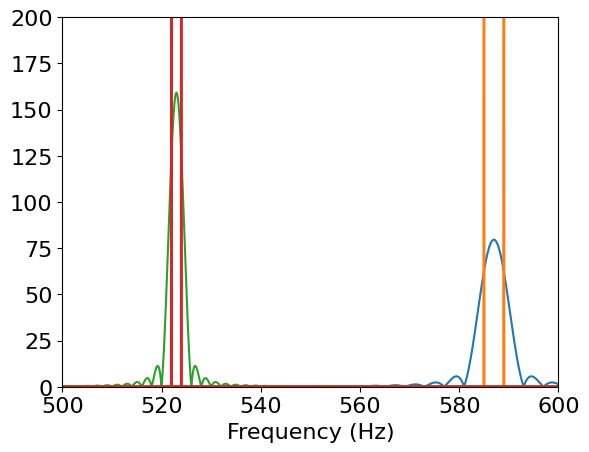

In [92]:
plt.xlim(500,600)
plt.ylim(0,200)
plt.xlabel("Frequency (Hz)")
plt.plot(freq, np.abs(S2l))
plt.plot(freq, np.abs(S2))
plt.plot(freq, np.abs(S1l))
plt.plot(freq, np.abs(S1))